In [2]:
# First import some modules
import numpy as np
import matplotlib.pyplot as plt

from ripser import ripser
import dionysus as dion
import cechmate as cm
from persim import plot_diagrams

In [3]:
# define a function to generate two circles 
def generate_twocircles(num_points):
    angle = np.linspace(0, np.pi*2, num=num_points)
    r = 1
    x = np.array([r * np.cos(angle), r*np.sin(angle)])
    data = np.concatenate((x,np.array([x[0,:]+4, x[1,:]])), axis=1)
    
    return data

def convert_dionysus_diagram(dgms):
    ''' We convert the diagram from dionysus into a numpy array
        The format of the array is dimension-birth-death-simplex index
    '''
    H = np.empty([4,])
    for idgm, dgm in enumerate(dgms):
        for pt in dgm:
            newrow = np.array([idgm, pt.birth, pt.death, pt.data]);
            H = np.vstack((H,newrow))
    H =  np.delete(H, 0, 0)
    return H    

def dist2filtration(dist_filtration):
    '''
        This function converts a filtration as a list from cechmate to 
        dionysus compatible
    '''
    ordered_simplices = sorted(dist_filtration, key=lambda x: (x[1], len(x[0])))
    f = dion.Filtration()
    for vertices, time in ordered_simplices:
        f.append(dion.Simplex(vertices, time))
        
    return f

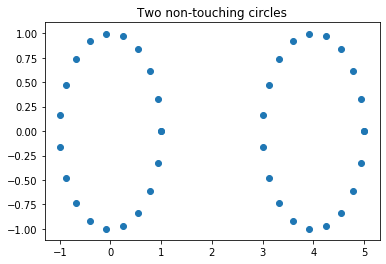

In [4]:
# generate the dataset and plot it
number_points = 20;
points = generate_twocircles(number_points).T
plt.scatter(points[:,0], points[:,1])
plt.title('Two non-touching circles')
plt.show()

Doing spatial.Delaunay triangulation...
Finished spatial.Delaunay triangulation (Elapsed Time 0.00053)
Building alpha filtration...
Finished building alpha filtration (Elapsed Time 0.0125)
Constructing boundary matrix...
Finished constructing boundary matrix (Elapsed Time 0.00185)
Computing persistence pairs...
Finished computing persistence pairs (Elapsed Time 0.000355)


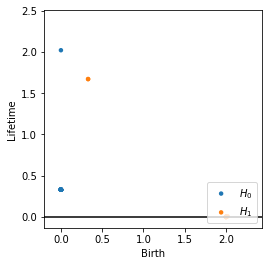

In [5]:
# Compute apha filtrations using cechmate
alpha = cm.Alpha()
alpha_filtration = alpha.build(2*points) # Alpha goes by radius instead of diameter
dgmsalpha = alpha.diagrams(alpha_filtration)

plot_diagrams(dgmsalpha, lifetime=True)
plt.show()

In [6]:
# Compute the vertex values using alpha filtration
prime = 2
f = dist2filtration(alpha_filtration)
p = dion.cohomology_persistence(f, prime, True)
dgms = dion.init_diagrams(p, f)    
H = convert_dionysus_diagram(dgms)
H1 = H[H[:,0]==1,:] # Collect H1 

In [7]:
# Collect the maximum persistence H1 index (You can collect multiple)
lifetime_H1 = H1[:, 2] - H1[:, 1]
idx = np.where(lifetime_H1>1.5) # collect data above the lifetime
num_cocyles = np.shape(idx)[1]
print("there are %d circular shapes in the data..."%num_cocyles)
vertex_values = np.zeros((num_cocyles,number_points*2))
for ind, val in enumerate(idx[0]):
    cocycle = p.cocycle(H1[val,3].astype(int))
    f_restricted = dion.Filtration([s for s in f if s.data <= (H1[val,1] + H1[val,2])/2])
    vertex_values[ind,:] = dion.smooth(f_restricted, cocycle, prime)

there are 2 circular shapes in the data...


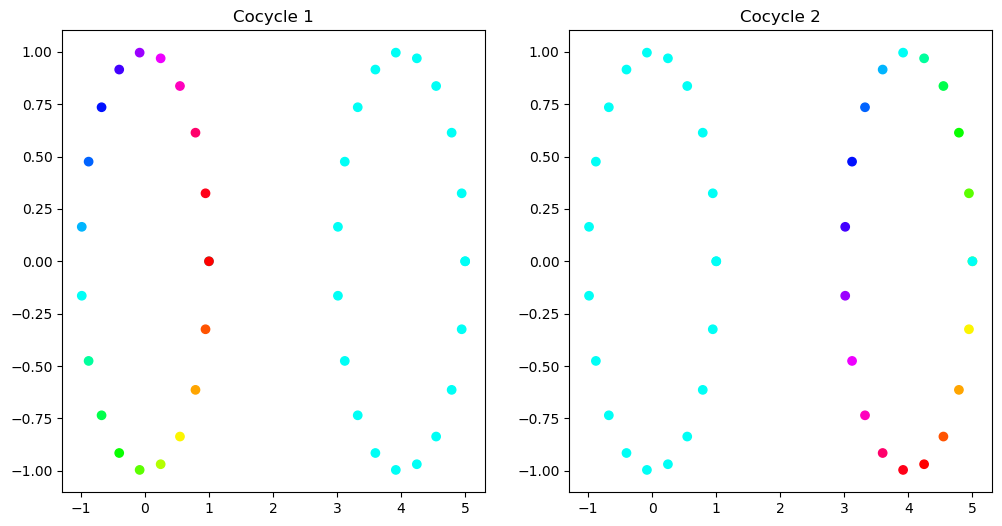

In [8]:
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.scatter(points[:,0], points[:,1], c = vertex_values[0,:], cmap = 'hsv')
plt.title('Cocycle 1')

plt.subplot(122)
plt.scatter(points[:,0], points[:,1], c = vertex_values[1,:], cmap = 'hsv')
plt.title('Cocycle 2')

plt.show()

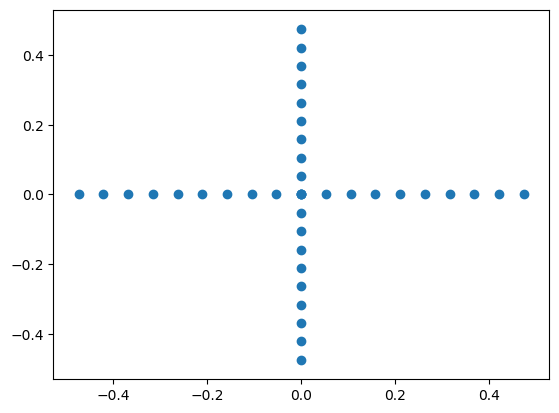

In [10]:
plt.scatter(vertex_values[0,:], vertex_values[1,:])
plt.show()